In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline


# GeoParsing Imports

In [ ]:

"""
! pip install geotext
! pip install geopy
import geopandas as gpd

from urllib import request
from geotext import GeoText

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

from shapely.geometry import Point, Polygon
import descartes
"""

'\n! pip install geotext\n! pip install geopy\nimport geopandas as gpd\n\nfrom urllib import request\nfrom geotext import GeoText\n\nfrom geopy.geocoders import Nominatim\nfrom geopy.exc import GeocoderTimedOut\n\nfrom shapely.geometry import Point, Polygon\nimport descartes\n'

In [ ]:
Data_dir = '/content/drive/MyDrive/Colab Notebooks/DataSets/Dating App Data/'
from ast import literal_eval
df = pd.read_csv(Data_dir+ 'data_all.csv',converters={'lat_Lon': literal_eval})
df.drop(['Unnamed: 0'],axis=1,inplace=True)
sample_df = pd.read_csv(Data_dir + 'sample dataset.csv')
sample_sub = pd.read_csv(Data_dir + 'sample submission.csv')
#df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              2001 non-null   object 
 1   username             2001 non-null   object 
 2   age                  2001 non-null   int64  
 3   status               2001 non-null   object 
 4   sex                  2001 non-null   object 
 5   orientation          2001 non-null   object 
 6   drinks               2001 non-null   object 
 7   drugs                2001 non-null   object 
 8   height               2001 non-null   float64
 9   job                  2001 non-null   object 
 10  location             2001 non-null   object 
 11  pets                 2001 non-null   object 
 12  smokes               2001 non-null   object 
 13  language             2001 non-null   object 
 14  new_languages        2001 non-null   object 
 15  body_profile         2001 non-null   o

In [ ]:
df.columns

Index(['user_id', 'username', 'age', 'status', 'sex', 'orientation', 'drinks',
       'drugs', 'height', 'job', 'location', 'pets', 'smokes', 'language',
       'new_languages', 'body_profile', 'education_level', 'dropped_out',
       'bio', 'interests', 'other_interests', 'location_preference', 'City',
       'State', 'lat_Lon'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f821d2e4828>,
      dtype=object)

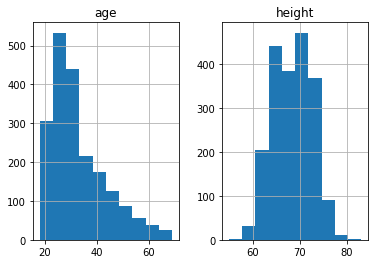

In [ ]:
df[['age','height']].hist()

## Location Score


In [ ]:
def loc_transform(data):
  LocationList = str(data['location']).split(",")
  data['City'] = LocationList[0]
  data['State'] = LocationList[1]
  #data['location'] = str(data['location']).title() + ",United States of America"
  return data
#df.head() 
#sample_df = sample_df.apply(transform, axis = 1)

In [ ]:
from math import sin, cos, sqrt, atan2, radians
def distance(LL1,LL2):
  # approximate radius of earth in km
  R = 6373.0

  lat1 = radians(LL1[0])
  lon1 = radians(LL1[1])
  lat2 = radians(LL2[0])
  lon2 = radians(LL2[1])

  dlon = lon2 - lon1
  dlat = lat2 - lat1

  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  distance = R * c
  return distance


def loc_score(d1,d2):
  score=0
  dis = distance(d1.lat_Lon.iloc[0],d2.lat_Lon.iloc[0])
  if(d1.location_preference.iloc[0] == 'same city' and dis == 0):
    score = 100
  elif(d1.location_preference.iloc[0] == 'same city' and 0< dis <= 10 ) :
    score = 90
  elif(d1.location_preference.iloc[0] == 'same city' and 10< dis <= 20 ) :
    score = 80
  elif(d1.location_preference.iloc[0] == 'same city' and 20< dis <= 30 ) :
    score = 70
  elif(d1.location_preference.iloc[0] == 'same city' and 30< dis <= 40 ) :
    score = 60
  elif(d1.location_preference.iloc[0] == 'same city' and 0< dis <= 50 ) :
    score = 50
  elif(d1.location_preference.iloc[0] == 'same city' and 50 <dis <= 100 ) :
    score = 30
  elif(d1.location_preference.iloc[0] == 'same city' and 100 <dis <= 200 ) :
    score = 10
  elif(d1.State.iloc[0] == d2.State.iloc[0] and d1.location_preference.iloc[0] == 'same state' ):
    score = 100
  elif(d1.location_preference.iloc[0] == 'anywhere' and dis <= 10):
    score = 100
  elif(d1.location_preference.iloc[0] == 'anywhere' and 10 < dis <= 100 ):
    score = 75
  elif(d1.location_preference.iloc[0] == 'anywhere' and 100 < dis <= 200 ):
    score = 50
  elif(d1.location_preference.iloc[0] == 'anywhere' and 200 < dis <= 500 ):
    score = 25 
  return score

In [ ]:
d1 = df[df.user_id == "fffe3600"]
d2 = df[df.user_id == "fffe3200"]


In [ ]:
loc_score(d1,d2)

60

# Pet Scoring

In [ ]:
def pets_trans(data):
  data['likes_dogs'] = data.pets.apply(lambda x: 1 if 'likes dogs' in x else (1 if 'has dogs' in x else 0 ) )
  data['has_dogs'] = data.pets.apply(lambda x: 1 if 'has dogs' in x else 0 )
  data['likes_cats'] = data.pets.apply(lambda x: 1 if 'likes cats' in x else (1 if 'has cats' in x else 0 ) )
  data['has_cats'] = data.pets.apply(lambda x: 1 if 'has cats' in x else 0 )
  data['dislikes_dogs'] = data.pets.apply(lambda x: 1 if 'dislikes dogs' in x else 0 )
  data['dislikes_cats'] = data.pets.apply(lambda x: 1 if 'dislikes cats' in x else 0 )
  return data

#df = pets_trans(df)
df.head(1)

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference,City,State,lat_Lon
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine / health,"oakland, california",likes dogs and likes cats,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,sports,instruments,same state,oakland,california,"[37.8044557, -122.2713563]"


In [ ]:
def pets_score(d1,d2):
  score = 0
  if (d1.likes_dogs.iloc[0] == 1 and d2.likes_dogs.iloc[0] == 1):
    score+=100
  if (d1.likes_dogs.iloc[0] == 1 and d2.has_dogs.iloc[0] == 1):
    score+=100
  if (d1.has_dogs.iloc[0] == 1 and d2.likes_dogs.iloc[0] == 1):
    score+=100
  if (d1.dislikes_dogs.iloc[0] == 1 and d2.dislikes_dogs.iloc[0] == 1):
    score+=100

  if (d1.likes_cats.iloc[0] == 1 and d2.likes_cats.iloc[0] == 1):
    score+=100
  if (d1.likes_cats.iloc[0] == 1 and d2.has_cats.iloc[0] == 1):
    score+=100
  if (d1.has_cats.iloc[0] == 1 and d2.likes_cats.iloc[0] == 1):
    score+=100
  if (d1.dislikes_cats.iloc[0] == 1 and d2.dislikes_cats.iloc[0] == 1):
    score+=100

  if (d1.likes_dogs.iloc[0] == 1 and d2.dislikes_dogs.iloc[0] == 1):
    score-=50
  if (d1.dislikes_dogs.iloc[0] == 1 and d2.likes_dogs.iloc[0] == 1):
    score-=50
  if (d1.has_dogs.iloc[0] == 1 and d2.dislikes_dogs.iloc[0] == 1):
    score-=100
  if (d1.dislikes_dogs.iloc[0] == 1 and d2.has_dogs.iloc[0] == 1):
    score-=100

  if (d1.likes_cats.iloc[0] == 1 and d2.dislikes_cats.iloc[0] == 1):
    score-=50
  if (d1.dislikes_cats.iloc[0] == 1 and d2.likes_cats.iloc[0] == 1):
    score-=50
  if (d1.has_cats.iloc[0] == 1 and d2.dislikes_cats.iloc[0] == 1):
    score-=100
  if (d1.dislikes_cats.iloc[0] == 1 and d2.has_cats.iloc[0] == 1):
    score-=100

  

  return score/4

In [ ]:
#pets_score(d1,d2)

In [ ]:
df.head()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference,City,State,lat_Lon
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine / health,"oakland, california",likes dogs and likes cats,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,sports,instruments,same state,oakland,california,"[37.8044557, -122.2713563]"
1,fffe3200,Travis Young,26,single,m,gay,socially,never,68.0,other,"pleasant hill, california",likes dogs,no,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",painting,instruments,anywhere,pleasant hill,california,"[37.9479786, -122.0607963]"
2,fffe3300,Agnes Smith,20,seeing someone,f,bisexual,socially,sometimes,69.0,other,"oakland, california",has dogs and likes cats,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,no,mmmmm yummy tacosss. yoga is where it's at. i ...,instruments,dancing,same city,oakland,california,"[37.8044557, -122.2713563]"
3,fffe3400,Salvador Klaver,27,single,m,bisexual,socially,sometimes,68.0,computer / hardware / software,"daly city, california",likes dogs and likes cats,no,english,not interested,average,3.0,no,i'm a stealth geek. that special mix of techni...,sketching,acting,same city,daly city,california,"[37.6904826, -122.4726708]"
4,fffe3500,Elana Sewell,22,single,f,bisexual,often,sometimes,68.0,other,"oakland, california",likes dogs and likes cats,yes,english,not interested,average,2.0,yes,with the whisper of the wind i was weaved into...,craft,designing,same city,oakland,california,"[37.8044557, -122.2713563]"


## Age Scoring

In [ ]:
def age_score1(d1,d2):
  if d1.age.iloc[0]>d2.age.iloc[0]:
    if d2.age.iloc[0] >= (d1.age.iloc[0]/2)+7:
      score=100
    else:
      score=0
  else:
    if d1.age.iloc[0] >= (d2.age.iloc[0]/2)+7:
      score=100
    else:
      score=0
  return score

In [ ]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

def age_score2(d1,d2):
  score = euclidean_distance(d1.age.iloc[0],d2.age.iloc[0])
  return round(100-score,2)
age_score2(df.iloc[[233]],df.iloc[[1856]])

84.0

In [ ]:
print(df.age[0],df.age[1])
age_score2(df.iloc[[0]],df.iloc[[1]])

27 26


99.0

# DDS Scoring

In [ ]:
drinks_yes = ['very often','desperately','often']
drinks_rare = ['socially', 'rarely']
drinks_no = ['not at all']

smokes_yes = ['sometimes', 'yes', 'when drinking', 'trying to quit']
smokes_no = ['no']

drugs_yes = ['sometimes','often']
drugs_no = ['never']
def dds_score(d1,d2):
  score = 0
  if (d1.drinks.iloc[0] in drinks_yes and d2.drinks.iloc[0] in drinks_yes):
    score +=100
  elif (d1.drinks.iloc[0] in drinks_yes and d2.drinks.iloc[0] in drinks_rare):
    score +=50
  elif (d1.drinks.iloc[0] in drinks_rare and d2.drinks.iloc[0] in drinks_yes):
    score +=50
  elif (d1.drinks.iloc[0] in drinks_rare and d2.drinks.iloc[0] in drinks_rare):
    score+=100
  elif (d1.drinks.iloc[0] in drinks_no and d2.drinks.iloc[0] in drinks_no):
    score +=100
  elif (d1.drinks.iloc[0] in drinks_rare and d2.drinks.iloc[0] in drinks_no):
    score +=50
  elif (d1.drinks.iloc[0] in drinks_no and d2.drinks.iloc[0] in drinks_rare):
    score +=50

  if (d1.smokes.iloc[0] in smokes_yes and d2.smokes.iloc[0] in smokes_yes):
    score +=100 
  elif (d1.smokes.iloc[0] in smokes_no and d2.smokes.iloc[0] in smokes_no):
    score +=100

  if (d1.drugs.iloc[0] in drugs_yes and d2.drugs.iloc[0] in drugs_yes):
    score +=100 
  elif (d1.drugs.iloc[0] in drugs_no and d2.drugs.iloc[0] in drugs_no):
    score +=100

  return score/3

In [ ]:
#dds_score(d1,d2)

# Education Scoring

In [ ]:
def edu_score(d1,d2):
  score=0
  if (d2.education_level.iloc[0] == d1.education_level.iloc[0]):
    score+=100
  if (d2.education_level.iloc[0] == d1.education_level.iloc[0] - 1):
    score+=50
  if (d2.education_level.iloc[0] == d1.education_level.iloc[0] + 1):
    score+=50
  if (d2.education_level.iloc[0] == d1.education_level.iloc[0] - 2):
    score+=25
  if (d2.education_level.iloc[0] == d1.education_level.iloc[0] + 2):
    score+=25
  if (d1.dropped_out.iloc[0] == d2.dropped_out.iloc[0]):
    if score == 100 :
      score += 100
    else:
      score +=50
       
  return score/2

In [ ]:
#edu_score(d1,d2)

# Interest Score

In [ ]:
def interest_trans(data):
  data['interests'] = data[['interests','other_interests']].values.tolist()
  return data


In [ ]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer
import scipy
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
def int_score(d1,d2):
  l1 = d1.interests.iloc[0]
  l2 = d2.interests.iloc[0]
  score=0
  if l1 and l2:
    s1 = ' '.join(l1)
    s2 = ' '.join(l2)
    document_embeddings1 = sbert_model.encode(s1)
    document_embeddings2 = sbert_model.encode(s2)
    cosine = scipy.spatial.distance.cosine(document_embeddings1,document_embeddings2)
  else:
    cosine=1

  c = sum(el in l1 for el in l2)
  score+= (100*c)

  return ((round((1-cosine)*100,2)*2)+score)/3

# Status Score

In [ ]:
def status_score(d1,d2):
  y = ['single', 'available']
  n = ['seeing someone', 'married']
  score=0
  if (d1.status.iloc[0] in y and d2.status.iloc[0] in y):
    score +=100
  return score

In [ ]:
status_score(d1,d2)

100

# BodyProfile Score

In [ ]:
def body_score(d1,d2):
  a = ['average', 'fit', 'athletic','jacked']
  b = ['curvy', 'a little extra','full figured', 'overweight']
  c = ['thin','skinny']
  score=0
  if d1.body_profile.iloc[0] in a and d2.body_profile.iloc[0] in a:
    score+=100
  if d1.body_profile.iloc[0] in b and d2.body_profile.iloc[0] in b:
    score+=100
  if d1.body_profile.iloc[0] in c and d2.body_profile.iloc[0] in c:
    score+=100
    
  return score

In [ ]:
#body_score(d1,d2)

# Ethnicity Score

In [ ]:
!pip install ethnicolr
from ethnicolr import census_ln, pred_census_ln
def ethnicity_tran(data):
  data['last_name'] = data['username'].apply(lambda x : x.split(' ')[1])
  data['race'] = pred_census_ln(data[['last_name']], namecol = 'last_name', year=2010)['race']
  return data
def race_score(d1,d2):
  score=0
  if d1.race.iloc[0] == d2.race.iloc[0]:
    score+=100
  return score

# Language Score

In [ ]:
def lang_list(string):
  l =string.split(',')
  l = [word.strip()for word in l]
  m=[]
  n=[]
  for word in l:
    if word.startswith('eng'):
      pass
    else:
      m.append(word)
  for word in m:
    n.append(word.split(' ')[0])
  return n
def language(data):
  data['know_english'] = data['language'].apply(lambda x: 0 if x.startswith('english (poorly)') else 1 )
  data['other_lang'] = data['language'].apply(lambda x: lang_list(x))
  return data

In [ ]:
def lang_score(d1,d2):
  score = 100 if d1.know_english.iloc[0] else 0
  c = sum(el in d1.other_lang.iloc[0] for el in d2.other_lang.iloc[0])
  score+= (100*c)
  if c ==0 and d1.new_languages.iloc[0]=='interested':
    score+=50
  if c ==0 and d2.new_languages.iloc[0]=='interested':
    score+=50
  return score/2

In [ ]:
#lang_score(d1,d2)

# Orientation Score

In [ ]:
df.groupby(["orientation","sex"]).count()['user_id']

orientation  sex
bisexual     f       84
             m       28
gay          f       40
             m      113
straight     f      738
             m      998
Name: user_id, dtype: int64

In [ ]:
def ori_score(d1,d2):
  score = 0
  if (d1.orientation.iloc[0] == 'straight' and d2.orientation.iloc[0] == 'straight'):
    score += 100
  elif (d1.orientation.iloc[0] == 'gay' and d2.orientation.iloc[0] == 'gay'):
    score += 100 
  elif (d1.orientation.iloc[0] == 'bisexual' and d2.orientation.iloc[0] == 'bisexual'):
    score += 100 
  
  return score

In [ ]:
#ori_score(d1,d2)

# Final Model

In [ ]:
Data_dir = '/content/drive/MyDrive/Colab Notebooks/DataSets/Dating App Data/'
from ast import literal_eval
df = pd.read_csv(Data_dir+ 'data_all.csv',converters={'lat_Lon': literal_eval})
df.drop(['Unnamed: 0'],axis=1,inplace=True)
sample_df = pd.read_csv(Data_dir + 'sample dataset.csv')
sample_sub = pd.read_csv(Data_dir + 'sample submission.csv',index_col = ["user_id"])

In [ ]:
def final_trans(data):
  #data['job_list'] = data['job'].apply(lambda x: job_list(x))
  data = data.apply(loc_transform, axis = 1)
  #data = interest_trans(data)
  
  #data = ethnicity_tran(data)
  data = pets_trans(data)
  data = language(data)
  
  return data

In [ ]:
df = final_trans(df)
#df.head(4)

In [ ]:
def normalisation(OldValue,OldMax,OldMin):
  NewMax=100
  NewMin=0
  #OldValue=score

  OldRange = (OldMax - OldMin)  
  NewRange = (NewMax - NewMin)  
  NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
  return NewValue

**97.93 Score Weights Used:**

"age":0.2,"location":0.30,"drinks_drugs_smokes":0.1,
 "pets":0.15,"education_level":0.1,"status":0.1,"body_profile":0.05

Score : 97.94 (85 % Weight ):
weights = {"age":0.13,"location":0.2,"drinks_drugs_smokes":0.08,'language' : 0.05,
           "pets":0.08,"education_level":0.05,"status":0.08,"body_profile":0.03,"orientation":0.15}*

Score : 97.954
weights = {"age":0.2,"location":0.15,"drinks_drugs_smokes":0.05,'language' : 0.05,
           "pets":0.05,"education_level":0.05,"status":0.05,"body_profile":0.05,"orientation":0.2}

Score 97.95845 
weights = {"age":0.1,"location":0.1,"drinks_drugs_smokes":0.1,'language' : 0.1,
           "pets":0.1,"education_level":0.1,"status":0.1,"body_profile":0.05,"orientation":0.1}

Score : 97.94 Result 7:
weights = {"age":0.15,"location":0.15,"drinks_drugs_smokes":0.1,'language' : 0.05,
           "pets":0.05,"education_level":0.05,"status":0.1,"body_profile":0.05,"orientation":0.15}

Score 97.97 Result 8s:
weights = {"age":0.1,"location":0.1,"drinks_drugs_smokes":0.1,'language' : 0.1,
           "pets":0.1,"education_level":0.05,"status":0.05,"body_profile":0.05,"orientation":0.1}

Result 8s_2 = result_8 + 3/2 * bio + 2/3 * NLP

Result 8s_3 = result_8 * (65/75) + 2 * Bio + NLP

Here we will take 85% score & 15% score will be given on : Interest(10%),Job(5%){From nlp_result.csv}

In [ ]:
#df.columns
weights = {"age":0.15,"location":0.15,"drinks_drugs_smokes":0.1,'language' : 0.05,
           "pets":0.05,"education_level":0.05,"status":0.1,"body_profile":0.05,"orientation":0.15}

In [ ]:
def score_fin(d1,d2):
  # age score
  age_sc = normalisation(age_score2(d1,d2),100,49)
  age_sc = age_sc * weights['age']

  # location score
  loca_sc = loc_score(d1,d2) * weights['location']

  # drinks_drugs_smokes score
  dds_sc = dds_score(d1,d2) * weights['drinks_drugs_smokes']

  # job score

  #job_sc = job_bert(d1.job_list.iloc[0],d2.job_list.iloc[0]) * weights['job']

  # pet score
  pet_sc = pets_score(d1,d2) * weights['pets']

  #language score
  lan_sc = lang_score(d1,d2) * weights['language']
  
  #body_profile score
  bp_sc = body_score(d1,d2) * weights['body_profile']

  #education level
  edu_sc = edu_score(d1,d2) * weights['education_level']

  #bio score
  #bio_sc = bert(d1,d2) * weights['bio']

  #interest score
  #int_sc = int_score(d1,d2) * weights['interests']

  #race score
  #race_sc = race_score(d1,d2) * weights['race']

  #status score
  status_sc = status_score(d1,d2) * weights['status']

  #orientation score
  ori_sc = ori_score(d1,d2) * weights['orientation']



  return round(fin_score,2)

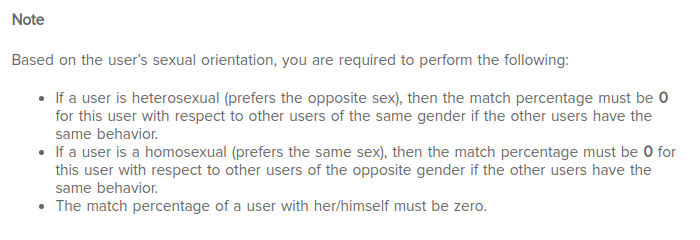

In [ ]:
def match_final(data):
  
  result = pd.DataFrame(data = np.zeros((data.user_id.nunique(), data.user_id.nunique())),  
                        index = data.user_id.tolist(),  
                        columns = data.user_id.tolist())
  
  result.index.name = 'user_id'

  k=1
  for i in result.index:
    for j in result.columns:

      d1 = data[data.user_id==i] 
      d2 = data[data.user_id==j]

      if (d1.user_id.iloc[0] == d2.user_id.iloc[0]):
        result.loc[i,j] = 0
        pass

      else:
        # Same Sex People
        if (d1.sex.iloc[0] == d2.sex.iloc[0]):
          if (d1.orientation.iloc[0] == 'straight' and d2.orientation.iloc[0] in ['straight','gay','bisexual']):
            result.loc[i,j] = 0
          elif (d1.orientation.iloc[0] == 'gay' and d2.orientation.iloc[0] == 'gay'):
            result.loc[i,j] = score_fin(d1,d2)
          elif (d1.orientation.iloc[0] == 'gay' and d2.orientation.iloc[0] == 'bisexual'):
            result.loc[i,j] = score_fin(d1,d2) 
          elif (d1.orientation.iloc[0] == 'gay' and d2.orientation.iloc[0] == 'straight'):
            result.loc[i,j] = score_fin(d1,d2) 
          elif (d1.orientation.iloc[0] == 'bisexual' and d2.orientation.iloc[0] == 'bisexual'): 
            result.loc[i,j] = score_fin(d1,d2) 
          elif (d1.orientation.iloc[0] == 'bisexual' and d2.orientation.iloc[0] == 'straight'):
            result.loc[i,j] = score_fin(d1,d2) 
          elif (d1.orientation.iloc[0] == 'bisexual' and d1.sex.iloc[0] == 'm' and d2.orientation.iloc[0] == 'gay'):
            result.loc[i,j] = 0
          elif (d1.orientation.iloc[0] == 'bisexual'and d1.sex.iloc[0] == 'f' and d2.orientation.iloc[0] == 'gay'):
            result.loc[i,j] = score_fin(d1,d2) 

          

        
        #Opposite Sex People
        else:
          if (d1.orientation.iloc[0] == 'straight' and d2.orientation.iloc[0] == 'straight'):
            result.loc[i,j] = score_fin(d1,d2)
          elif (d1.orientation.iloc[0] == 'straight' and d2.orientation.iloc[0] in ['gay','bisexual']):
            result.loc[i,j] = score_fin(d1,d2) 
          elif (d1.orientation.iloc[0] == 'gay' and d2.orientation.iloc[0] in ['gay','bisexual','straight']):
            result.loc[i,j] = 0
          elif (d1.orientation.iloc[0] == 'bisexual' and d2.orientation.iloc[0] == 'bisexual'):
            result.loc[i,j] = 0
          elif (d1.orientation.iloc[0] == 'bisexual' and d2.orientation.iloc[0] == 'gay'):
            result.loc[i,j] = 0
          elif (d1.orientation.iloc[0] == 'bisexual' and d2.orientation.iloc[0] == 'straight' ):
            result.loc[i,j] = score_fin(d1,d2)


    if k%10==0:
      print('{} iteration done'.format(k))
    k+=1

  print('Process Done') 


  return result


In [ ]:
import time

# starting time
start = time.time()
print(start)
result = match_final(df)
#time.sleep(1)
end = time.time()
print(f"Runtime of the program is {(end - start)/3600} sec")
result.to_csv(Data_dir + "result_7.csv")
result

1608619294.7267532
10 iteration done
20 iteration done
30 iteration done
40 iteration done
50 iteration done
60 iteration done
70 iteration done
80 iteration done
90 iteration done
100 iteration done
110 iteration done
120 iteration done
130 iteration done
140 iteration done
150 iteration done
160 iteration done
170 iteration done
180 iteration done
190 iteration done
200 iteration done
210 iteration done
220 iteration done
230 iteration done
240 iteration done
250 iteration done
260 iteration done
270 iteration done
280 iteration done
290 iteration done
300 iteration done
310 iteration done
320 iteration done
330 iteration done
340 iteration done
350 iteration done
360 iteration done
370 iteration done
380 iteration done
390 iteration done
400 iteration done
410 iteration done
420 iteration done
430 iteration done
440 iteration done
450 iteration done
460 iteration done
470 iteration done
480 iteration done
490 iteration done
500 iteration done
510 iteration done
520 iteration done
53

,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500,fffe3600,fffe3700,fffe3800,fffe3900,fffe31003000,fffe31003100,fffe31003200,fffe31003300,fffe31003400,fffe31003500,fffe31003600,fffe31003700,fffe31003800,fffe31003900,fffe32003000,fffe32003100,fffe32003200,fffe32003300,fffe32003400,fffe32003500,fffe32003600,fffe32003700,fffe32003800,fffe32003900,fffe33003000,fffe33003100,fffe33003200,fffe33003300,fffe33003400,fffe33003500,fffe33003600,fffe33003700,fffe33003800,fffe33003900,fffe34003000,...,fffe3100390036003200,fffe3100390036003300,fffe3100390036003400,fffe3100390036003500,fffe3100390036003600,fffe3100390036003700,fffe3100390036003800,fffe3100390036003900,fffe3100390037003000,fffe3100390037003100,fffe3100390037003200,fffe3100390037003300,fffe3100390037003400,fffe3100390037003500,fffe3100390037003600,fffe3100390037003700,fffe3100390037003800,fffe3100390037003900,fffe3100390038003000,fffe3100390038003100,fffe3100390038003200,fffe3100390038003300,fffe3100390038003400,fffe3100390038003500,fffe3100390038003600,fffe3100390038003700,fffe3100390038003800,fffe3100390038003900,fffe3100390039003000,fffe3100390039003100,fffe3100390039003200,fffe3100390039003300,fffe3100390039003400,fffe3100390039003500,fffe3100390039003600,fffe3100390039003700,fffe3100390039003800,fffe3100390039003900,fffe3200300030003000,fffe3200300030003100
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fffe3100,0.000000,0.000000,41.899510,0.000000,47.071078,0.000000,66.299020,0.000000,0.000000,0.000000,51.102941,59.117647,0.000000,60.735294,55.220588,0.000000,0.000000,58.455882,0.000000,0.000000,0.000000,59.705882,61.029412,0.000000,57.573529,0.000000,0.000000,60.661765,41.004902,52.279412,0.000000,56.102941,0.000000,0.000000,0.000000,57.316176,0.000000,0.000000,58.455882,0.000000,...,61.250000,0.000000,0.000000,58.897059,0.000000,52.794118,58.382353,53.308824,0.000000,58.455882,59.485294,55.992647,59.080882,51.029412,0.000000,0.000000,62.573529,0.000000,60.000000,56.801471,54.656863,0.000000,0.000000,59.080882,60.661765,52.181373,0.000000,54.411765,0.000000,60.330882,0.000000,0.000000,0.000000,48.480392,0.000000,0.000000,71.948529,0.000000,0.000000,55.257353
fffe3200,0.000000,0.000000,0.000000,52.622549,0.000000,51.691176,0.000000,50.955882,67.328431,45.453431,0.000000,0.000000,55.367647,0.000000,0.000000,48.848039,54.656863,0.000000,48.333333,49.289216,66.911765,0.000000,0.000000,53.039216,0.000000,65.416667,50.416667,0.000000,0.000000,0.000000,48.357843,0.000000,54.779412,67.941176,65.490196,0.000000,56.323529,43.872549,0.000000,45.073529,...,0.000000,37.034314,52.573529,0.000000,50.539216,0.000000,0.000000,0.000000,48.161765,0.000000,0.000000,0.000000,0.000000,0.000000,43.529412,54.264706,0.000000,52.573529,0.000000,0.000000,0.000000,53.578431,50.539216,0.000000,0.000000,0.000000,49.289216,0.000000,56.691176,0.000000,63.958333,55.073529,64.950980,0.000000,50.367647,49.828431,0.000000,59.411765,42.818627,0.000000
fffe3300,41.899510,0.000000,0.000000,0.000000,62.745098,0.000000,40.490196,36.274510,0.000000,43.605392,27.877451,40.406863,37.061275,35.884804,37.036765,31.541667,36.975490,34.068627,25.401961,0.000000,0.000000,42.818627,35.870098,32.946078,42.450980,0.000000,38.651961,39.862745,52.196078,43.803922,42.343137,34.127451,32.848039,0.000000,0.000000,38.465686,37.392157,0.000000,41.730392,25.392157,...,37.649510,47.450980,37.745098,35.296569,42.191176,32.318627,29.031863,28.208333,41.823529,40.980392,35.884804,38.642157,41.730392,27.428922,39.223039,36.583333,40.473039,35.517157,39.524510,54.450980,46.264706,44.313725,48.029412,38.605392,56.686275,41.372549,33.107843,33.936275,41.039216,40.568627,0.000000,38.892157,0.000000,35.213235,30.936275,47.990196,41.950980,35.230392,35.137255,39.656863
fffe3400,0.000000,0.000000,0.000000,0.000000,0.000000,60.813725,0.000000,47.166667,0.000000,47.955882,43.019608,54.034314,52.453431,49.401961,50.553922,46.558824,52.367647,50.372549,37.794118,66.828431,0.000000,53.122549,47.946078,48.4117

In [ ]:



#result.to_csv(Data_dir + "result_1.csv")
p = np.asarray(result)
z = (p > 100).sum()
z

6

In [ ]:
result_1 = pd.read_csv(Data_dir+ 'result_8.csv',index_col = ["user_id"])

In [ ]:
result_2 = pd.read_csv(Data_dir+ 'bio_result.csv',index_col = ["user_id"])
result_3 = pd.read_csv(Data_dir+ 'nlp_result.csv',index_col = ["user_id"])

In [ ]:
result = (65/75) * result_1 + 2 *result_2 +  result_3

In [ ]:
result

,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500,fffe3600,fffe3700,fffe3800,fffe3900,fffe31003000,fffe31003100,fffe31003200,fffe31003300,fffe31003400,fffe31003500,fffe31003600,fffe31003700,fffe31003800,fffe31003900,fffe32003000,fffe32003100,fffe32003200,fffe32003300,fffe32003400,fffe32003500,fffe32003600,fffe32003700,fffe32003800,fffe32003900,fffe33003000,fffe33003100,fffe33003200,fffe33003300,fffe33003400,fffe33003500,fffe33003600,fffe33003700,fffe33003800,fffe33003900,fffe34003000,...,fffe3100390036003200,fffe3100390036003300,fffe3100390036003400,fffe3100390036003500,fffe3100390036003600,fffe3100390036003700,fffe3100390036003800,fffe3100390036003900,fffe3100390037003000,fffe3100390037003100,fffe3100390037003200,fffe3100390037003300,fffe3100390037003400,fffe3100390037003500,fffe3100390037003600,fffe3100390037003700,fffe3100390037003800,fffe3100390037003900,fffe3100390038003000,fffe3100390038003100,fffe3100390038003200,fffe3100390038003300,fffe3100390038003400,fffe3100390038003500,fffe3100390038003600,fffe3100390038003700,fffe3100390038003800,fffe3100390038003900,fffe3100390039003000,fffe3100390039003100,fffe3100390039003200,fffe3100390039003300,fffe3100390039003400,fffe3100390039003500,fffe3100390039003600,fffe3100390039003700,fffe3100390039003800,fffe3100390039003900,fffe3200300030003000,fffe3200300030003100
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fffe3100,0.000000,0.000000,57.988000,0.000000,45.345333,0.000000,71.410667,0.000000,0.000000,0.000000,60.073333,70.078667,0.000000,67.504000,69.673333,0.000000,0.000000,66.700000,0.000000,0.000000,0.000000,67.566667,65.407333,0.000000,62.197333,0.000000,0.000000,69.528667,55.779333,60.338000,0.000000,59.928000,0.000000,0.000000,0.000000,66.836667,0.000000,0.000000,64.820000,0.000000,...,63.580000,0.000000,0.000000,65.139333,0.000000,66.175333,68.963333,63.975333,0.000000,66.260000,64.487333,63.808000,65.129333,62.796667,0.000000,0.000000,71.017333,0.000000,71.040000,67.179333,62.636667,0.000000,0.000000,65.953333,68.448667,57.325333,0.000000,60.007333,0.000000,69.156000,0.000000,0.000000,0.000000,56.099333,0.000000,0.000000,72.248000,0.000000,0.000000,63.579333
fffe3200,0.000000,0.000000,0.000000,57.327333,0.000000,57.832667,0.000000,55.977333,68.850667,48.827333,0.000000,0.000000,50.885333,0.000000,0.000000,56.689333,62.290000,0.000000,55.374000,49.841333,59.725333,0.000000,0.000000,55.888000,0.000000,61.330667,56.304000,0.000000,0.000000,0.000000,50.308000,0.000000,59.537333,67.736000,66.312667,0.000000,64.937333,56.180667,0.000000,54.457333,...,0.000000,49.102667,54.264000,0.000000,54.341333,0.000000,0.000000,0.000000,53.968667,0.000000,0.000000,0.000000,0.000000,0.000000,53.834000,63.271333,0.000000,57.864000,0.000000,0.000000,0.000000,60.750667,55.838000,0.000000,0.000000,0.000000,55.930000,0.000000,65.002667,0.000000,66.326667,54.070667,64.016667,0.000000,60.949333,51.697333,0.000000,59.535333,52.922000,0.000000
fffe3300,57.988000,0.000000,0.000000,0.000000,57.908000,0.000000,55.440000,49.452667,0.000000,58.004667,44.162000,54.643333,40.874000,51.085333,55.266667,48.505333,52.732000,49.698667,42.154000,0.000000,0.000000,58.108667,50.034000,44.634667,53.623333,0.000000,52.134667,56.680000,60.373333,51.463333,51.864000,48.513333,47.949333,0.000000,0.000000,54.454667,54.984000,0.000000,57.062000,41.680667,...,47.288000,58.106667,50.451333,46.907333,53.910000,48.997333,47.874667,44.978000,55.884000,53.955333,48.505333,51.894000,53.385333,47.854667,52.166667,53.463333,56.533333,48.280000,54.032000,62.962000,62.028000,55.270000,60.307333,53.465333,64.864000,50.851333,47.878667,49.928000,56.484667,58.415333,0.000000,46.600667,0.000000,50.366667,54.454667,56.332667,54.576667,46.198667,49.818667,52.030667
fffe3400,0.000000,0.000000,0.000000,0.000000,0.000000,58.690000,0.000000,53.972667,0.000000,47.840000,49.090667,59.979333,49.854000,53.924667,59.726000,53.961333,62.912000,55.327333,43.069333,61.907333,0.000000,58.720667,53.671333,55.3353

In [ ]:
result.to_csv(Data_dir + "result_8s_3.csv")